#EPIDEMIC MODEL

In [6]:
import sympy as sm
import matplotlib as plt
import numpy as np
import scipy.linalg as la
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [7]:


#Variable definition
S,E,I,A,R= sm.symbols('S,E,I,A,R')
beta,q,mu,eta,p,gamma,alpha,N= sm.symbols('beta,q,mu,eta,p,gamma,alpha,N')


#the system of equations
Sdot = N-beta*S*(I+q*A)-mu*S
display(Sdot)
Edot=beta*S*(I+q*A)-(mu+eta)*E
display(Edot)
Idot = p*eta*E-(mu+gamma)*I
display(Idot)
Adot=(1-p)*eta*E-(mu+alpha)*A
display(Adot)
Rdot=gamma*I+alpha*A-mu*R
display(Rdot)

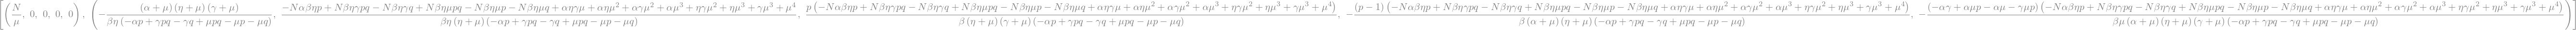

In [8]:
#Equilibrium points
SEq = sm.Eq(Sdot,0)
EEq = sm.Eq(Edot,0)
IEq = sm.Eq(Idot,0)
AEq = sm.Eq(Adot,0)
REq = sm.Eq(Rdot,0)
#hEq = sm.Eq(h,0)
# compute fixed points
equilibriam_points = sm.solve( (SEq,EEq,IEq,AEq,REq), S,E,I,A,R )
display(equilibriam_points)

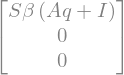

In [9]:
F_i=sm.Matrix([beta*S*(I+q*A),0,0])
F_i

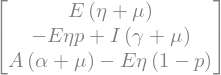

In [10]:
V_i=sm.Matrix([(mu+eta)*E,-Idot,-Adot])
V_i

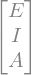

In [11]:
Mat=sm.Matrix([E,I,A])
Mat

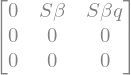

In [12]:
F=F_i.jacobian(Mat)
F

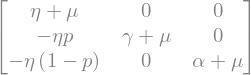

In [13]:
V=V_i.jacobian(Mat)
V

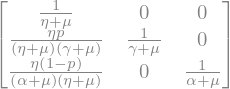

In [14]:
V_inv=V.inv()
V_inv

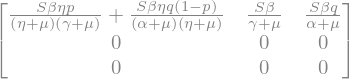

In [15]:
G=F*V_inv
G

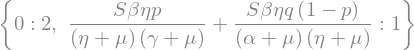

In [16]:
EV=G.eigenvals()
EV

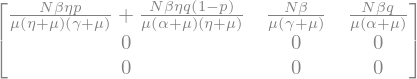

In [21]:
p=equilibriam_points[0][0]
q=equilibriam_points[0][1]
r=equilibriam_points[0][2]
Jacsub1=G.subs([(S,p),(E,q),(I,r)])
Jacsub1

In [22]:
p

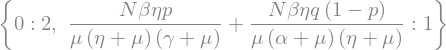

In [23]:
EV1=Jacsub1.eigenvals()
EV1